In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1

from pytamp.action.pick import PickAction
from pytamp.action.rearrangement import RearrangementAction


from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement


def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=21, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-8201b5da-b817-4141-a6b2-3a1e4e8839e6.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.28589337 -0.15274607  0.83529998]),
                           Object(name=can0, pos=[0.58607455 0.04268423 0.83517596]),
                           Object(name=can1, pos=[ 0.47260334 -0.00258885  0.83499824]),
                           Object(name=milk0, pos=[ 0.540033   -0.05217973  0.83236691]),
                           Object(name=cereal0, po

In [2]:
rearrangement1.scene_mngr.heuristic = False
pick = PickAction(rearrangement1.scene_mngr, n_contacts=10, n_directions=14)
rearr_action = RearrangementAction(rearrangement1.scene_mngr, n_sample=1)

In [3]:
pick_actions = list(pick.get_possible_actions_level_1())


In [4]:
pick_actions

[{'type': 'pick',
  'pick_obj_name': 'ben_cube0',
  'grasp_poses': [{'grasp': array([[-1.38777878e-17, -9.77462041e-01,  2.11111246e-01,
             2.37972756e-01],
           [-5.84200709e-01,  1.71339835e-01,  7.93317208e-01,
            -3.34477440e-01],
           [-8.11609223e-01, -1.23331340e-01, -5.71034018e-01,
             9.55656369e-01],
           [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             1.00000000e+00]]),
    'pre_grasp': array([[-1.3877788e-17, -9.7746205e-01,  2.1111125e-01,  2.1686164e-01],
           [-5.8420068e-01,  1.7133984e-01,  7.9331720e-01, -4.1380915e-01],
           [-8.1160921e-01, -1.2333134e-01, -5.7103401e-01,  1.0127598e+00],
           [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
          dtype=float32),
    'post_grasp': array([[-1.3877788e-17, -9.7746205e-01,  2.1111125e-01,  2.3797275e-01],
           [-5.8420068e-01,  1.7133984e-01,  7.9331720e-01, -3.3447745e-01],
           [-8.1160921e-01, -1.23331

In [5]:
for pick_action in pick_actions:
    for pick_scene in pick.get_possible_transitions(
        pick.scene_mngr.scene, action=pick_action
    ):
        print(pick_scene)
        rearr_place_actions = list(rearr_action.get_possible_actions_level_1(
                                    pick_scene,
                                    scene_for_sample = rearrangement1.init_scene,
                                    use_pick_action = True
                                    ))
        
        for rearr_candidate in rearr_place_actions:
            print("Rearr action",rearr_candidate)
            
            print(rearr_action.scene_mngr.scene.robot.gripper.attached_obj_name,rearr_action.scene_mngr.scene.robot.gripper.transform_bet_gripper_n_obj)
            print()

            

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.58065027, -0.27789912, -0.7652564 ,  0.81747687],
       [-0.06430976, -0.9526602 ,  0.29715785,  0.4592714 ],
       [-0.8116092 , -0.12333134, -0.571034  ,  0.95565635],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.58065027, -0.27789912, -0.7652564 ,  0.81747687],
       [-0.06430976, -0.9526602 ,  0.29715785,  0.4592714 ],
       [-0.8116092 , -0.12333134, -0.571034  ,  1.0556563 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.58065027, -0.27789912, -0.7652564 ,  0.8940025 ],
       [-0.06430976, -0.9526602 ,  0.29715785,  0.42955562],
       [-0.8116092 , -0.12333134, -0.571034  ,  1.0127598 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.33934436, -0.94066222,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.28537694, -0.73108053, -0.6197429 ,  0.5989361 ],
       [-0.3882202 , -0.6793856 ,  0.6226719 ,  0.03906361],
       [-0.87626773,  0.06290051, -0.47770122,  0.9430977 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.28537694, -0.73108053, -0.6197429 ,  0.5989361 ],
       [-0.3882202 , -0.6793856 ,  0.6226719 ,  0.03906361],
       [-0.87626773,  0.06290051, -0.47770122,  1.0430977 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.28537694, -0.73108053, -0.6197429 ,  0.66091037],
       [-0.3882202 , -0.6793856 ,  0.6226719 , -0.02320358],
       [-0.87626773,  0.06290051, -0.47770122,  0.99086785],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[-0.68810123, -0.72561471,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.68372655,  0.7281794 , -0.04767358,  0.7252865 ],
       [ 0.7169666 ,  0.68249416,  0.14198786, -0.05894721],
       [ 0.13592957,  0.06290051, -0.9887197 ,  1.049134  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.68372655,  0.7281794 , -0.04767358,  0.7252865 ],
       [ 0.7169666 ,  0.68249416,  0.14198786, -0.05894721],
       [ 0.13592957,  0.06290051, -0.9887197 ,  1.149134  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[-0.68372655,  0.7281794 , -0.04767358,  0.73005384],
       [ 0.7169666 ,  0.68249416,  0.14198786, -0.07314599],
       [ 0.13592957,  0.06290051, -0.9887197 ,  1.148006  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.69118648,  0.72267645,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': [], 'rearr_poses': []}
ben_cube0 [[-2.24559998e-01 -5.90366247e-02  9.72670285e-01 -3.74774315e-03]
 [ 1.00852567e-02  9.97968844e-01  6.29005104e-02 -7.56276373e-04]
 [-9.74408074e-01  2.39345680e-02 -2.23508482e-01  2.29789358e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.02743695, -0.921476  , -0.38746506,  0.82797635],
       [-0.0168747 , -0.3871288 ,  0.9218712 , -0.02962997],
       [-0.9994811 ,  0.03183169, -0.004928  ,  0.850766  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.02743695, -0.921476  , -0.38746506,  0.82797635],
       [-0.0168747 , -0.3871288 ,  0.9218712 , -0.02962997],
       [-0.9994811 ,  0.03183169, -0.004928  ,  0.950766  ],
       [ 0.        ,  0.        , 

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.810732  ,  0.16973145,  0.5602721 ,  0.78820205],
       [ 0.15792333,  0.9849761 , -0.06987308,  0.06306406],
       [-0.5637143 ,  0.03183169, -0.82535625,  1.0210049 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.810732  ,  0.16973145,  0.5602721 ,  0.78820205],
       [ 0.15792333,  0.9849761 , -0.06987308,  0.06306406],
       [-0.5637143 ,  0.03183169, -0.82535625,  1.1210049 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[-0.810732  ,  0.16973145,  0.5602721 ,  0.7321748 ],
       [ 0.15792333,  0.9849761 , -0.06987308,  0.07005137],
       [-0.5637143 ,  0.03183169, -0.82535625,  1.1035405 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.96819448,  0.25019882,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.16300201, -0.97491544, -0.1515594 ,  0.7206966 ],
       [-0.8040185 ,  0.22028767, -0.552293  ,  0.6551594 ],
       [ 0.5718256 ,  0.03183169, -0.8197574 ,  1.0198431 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.16300201, -0.97491544, -0.1515594 ,  0.7206966 ],
       [-0.8040185 ,  0.22028767, -0.552293  ,  0.6551594 ],
       [ 0.5718256 ,  0.03183169, -0.8197574 ,  1.1198431 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[-0.16300201, -0.97491544, -0.1515594 ,  0.73585254],
       [-0.8040185 ,  0.22028767, -0.552293  ,  0.7103887 ],
       [ 0.5718256 ,  0.03183169, -0.8197574 ,  1.1018188 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.29978281, -0.95400748,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.17586838,  0.83017796,  0.529032  ,  0.20219684],
       [ 0.18381989, -0.55565053,  0.8108408 ,  0.18628058],
       [ 0.9670991 , -0.04535465, -0.25032458,  0.89609087],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.17586838,  0.83017796,  0.529032  ,  0.20219684],
       [ 0.18381989, -0.55565053,  0.8108408 ,  0.18628058],
       [ 0.9670991 , -0.04535465, -0.25032458,  0.9960909 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.17586838,  0.83017796,  0.529032  ,  0.14929363],
       [ 0.18381989, -0.55565053,  0.8108408 ,  0.1051965 ],
       [ 0.9670991 , -0.04535465, -0.25032458,  0.9211233 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.54376033, -0.83924055,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.9451111 ,  0.29549608, -0.13945293,  0.90756184],
       [ 0.2989313 , -0.9542667 ,  0.00388082,  0.5998683 ],
       [-0.13192852, -0.04535465, -0.9902211 ,  1.0496194 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.9451111 ,  0.29549608, -0.13945293,  0.90756184],
       [ 0.2989313 , -0.9542667 ,  0.00388082,  0.5998683 ],
       [-0.13192852, -0.04535465, -0.9902211 ,  1.1496195 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.9451111 ,  0.29549608, -0.13945293,  0.9215071 ],
       [ 0.2989313 , -0.9542667 ,  0.00388082,  0.5994802 ],
       [-0.13192852, -0.04535465, -0.9902211 ,  1.1486416 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.95072947, -0.31002172,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.2038883 , -0.63642246, -0.7439059 ,  1.04015   ],
       [-0.11122594, -0.7700061 ,  0.628267  ,  0.07086764],
       [-0.9726553 , -0.04535465, -0.22778192,  0.8914133 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.2038883 , -0.63642246, -0.7439059 ,  1.04015   ],
       [-0.11122594, -0.7700061 ,  0.628267  ,  0.07086764],
       [-0.9726553 , -0.04535465, -0.22778192,  0.9914133 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.2038883 , -0.63642246, -0.7439059 ,  1.1145406 ],
       [-0.11122594, -0.7700061 ,  0.628267  ,  0.00804094],
       [-0.9726553 , -0.04535465, -0.22778192,  0.9141915 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.78021991,  0.6255053 ,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.7241613 ,  0.2736816 ,  0.63299984,  0.32190517],
       [ 0.1805828 ,  0.96110815, -0.20895196,  0.24625875],
       [-0.66556764, -0.03700604, -0.74541956,  0.989752  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.7241613 ,  0.2736816 ,  0.63299984,  0.32190517],
       [ 0.1805828 ,  0.96110815, -0.20895196,  0.24625875],
       [-0.66556764, -0.03700604, -0.74541956,  1.089752  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[-0.7241613 ,  0.2736816 ,  0.63299984,  0.25860518],
       [ 0.1805828 ,  0.96110815, -0.20895196,  0.26715395],
       [-0.66556764, -0.03700604, -0.74541956,  1.064294  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.2066781 , -0.978409  ,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[-0.4842345 , -0.2744656 , -0.83077407,  0.94538057],
       [-0.04566511,  0.95615715, -0.28927192,  0.06260133],
       [ 0.87374574, -0.10213806, -0.47553778,  0.93503076],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[-0.4842345 , -0.2744656 , -0.83077407,  0.94538057],
       [-0.04566511,  0.95615715, -0.28927192,  0.06260133],
       [ 0.87374574, -0.10213806, -0.47553778,  1.0350307 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[-0.4842345 , -0.2744656 , -0.83077407,  1.028458  ],
       [-0.04566511,  0.95615715, -0.28927192,  0.09152852],
       [ 0.87374574, -0.10213806, -0.47553778,  0.98258454],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[-0.98193194,  0.18923442,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.8597943 , -0.5064726 , -0.06510897,  0.7634319 ],
       [-0.4925265 , -0.8561853 ,  0.15609075,  0.37272632],
       [-0.13480105, -0.10213806, -0.9855945 ,  1.0408674 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.8597943 , -0.5064726 , -0.06510897,  0.7634319 ],
       [-0.4925265 , -0.8561853 ,  0.15609075,  0.37272632],
       [-0.13480105, -0.10213806, -0.9855945 ,  1.1408675 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.8597943 , -0.5064726 , -0.06510897,  0.7699428 ],
       [-0.4925265 , -0.8561853 ,  0.15609075,  0.35711724],
       [-0.13480105, -0.10213806, -0.9855945 ,  1.139427  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[ 0.81193783,  0.58374392,  0.  

Rearr action {'type': 'rearr', 'rearr_obj_name': 'ben_cube0', 'place_obj_name': 'table', 'rearr_poses': [({'release': array([[ 0.38952708, -0.32576123,  0.8614803 ,  0.39838967],
       [-0.06892488, -0.9430473 , -0.32544   ,  0.24486458],
       [ 0.91843235,  0.06739026, -0.3897955 ,  0.9228702 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'pre_release': array([[ 0.38952708, -0.32576123,  0.8614803 ,  0.39838967],
       [-0.06892488, -0.9430473 , -0.32544   ,  0.24486458],
       [ 0.91843235,  0.06739026, -0.3897955 ,  1.0228702 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_release': array([[ 0.38952708, -0.32576123,  0.8614803 ,  0.31224164],
       [-0.06892488, -0.9430473 , -0.32544   ,  0.27740857],
       [ 0.91843235,  0.06739026, -0.3897955 ,  0.96184975],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}, {'table': array([[-0.39956926,  0.91670301,  0.  

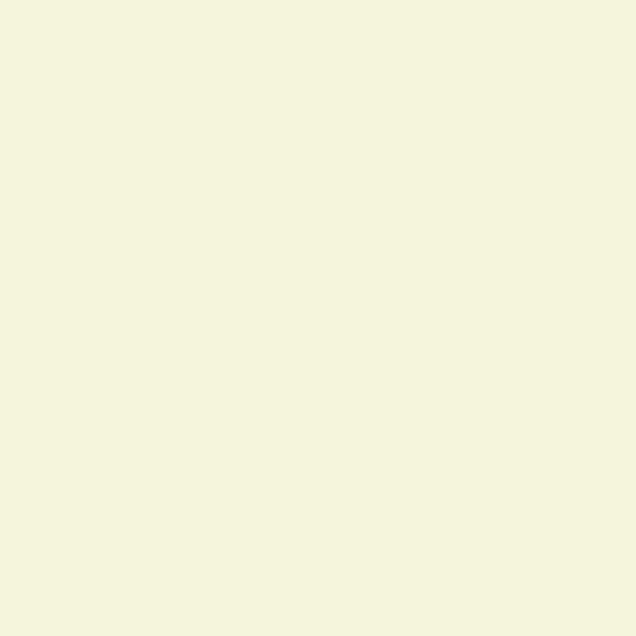

In [6]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
for pick_action in pick_actions:
    for all_grasp_pose in pick_action[pick.info.GRASP_POSES]:
        pick.scene_mngr.set_gripper_pose(all_grasp_pose[pick.move_data.MOVE_grasp])
        pick.scene_mngr.render_axis(ax, all_grasp_pose[pick.move_data.MOVE_grasp])
pick.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
pick.show()

In [7]:
rearrangement1.init_scene._objects

{'support_object': <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(48, 3))>,
 'ben_cube0': <trimesh.Trimesh(vertices.shape=(8, 3), faces.shape=(12, 3))>,
 'can0': <trimesh.Trimesh(vertices.shape=(511, 3), faces.shape=(956, 3))>,
 'can1': <trimesh.Trimesh(vertices.shape=(511, 3), faces.shape=(956, 3))>,
 'milk0': <trimesh.Trimesh(vertices.shape=(123, 3), faces.shape=(242, 3))>,
 'cereal0': <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(114, 3))>}

In [8]:
pick_action

{'type': 'pick',
 'pick_obj_name': 'cereal0',
 'grasp_poses': [{'grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64800145],
          [ 0.98766298,  0.02063615, -0.15522882,  0.01115118],
          [-0.15576782,  0.0277454 , -0.98740396,  1.0352062 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'pre_grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64493969],
          [ 0.98766298,  0.02063615, -0.15522882,  0.02667407],
          [-0.15576782,  0.0277454 , -0.98740396,  1.1339466 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'post_grasp': array([[-0.01606933,  0.99940199,  0.03061755,  0.64800145],
          [ 0.98766298,  0.02063615, -0.15522882,  0.01115118],
          [-0.15576782,  0.0277454 , -0.98740396,  1.1352062 ],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'grasp': array([[-0.02845737,  0.99940199,  0.01964271,  0.65027873],
          [ 0.94667057,  0.02063615,  0.32154158, -0.08